# This notebook shows an example of loading the latest USWC real time vector product from [HFRnet THREDDS server](http://hfrnet-tds.ucsd.edu/thredds/catalog.html)

Call %matplotlib inline to have plots shown inline in the notebook

%matplotlib inline must be called before any other packages are imported

In [15]:
%matplotlib inline

In [16]:
from netCDF4 import Dataset
import netCDF4 as netcdf
import numpy as np
from cartopy import crs,feature
import matplotlib.pyplot as plt

In [17]:
netcdf.getlibversion()

'4.6.2 of Dec 22 2018 22:51:02 $'

### load 6km USWC RTV dataset through THREDDS <br>Some other datasets are shown as commented lines below
You must adjust your map parameters if you change regions

In [18]:
#USWC region
#netcdf_data = Dataset('http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USEGC/2km/hourly/RTV/HFRADAR_US_East_and_Gulf_Coast_2km_Resolution_Hourly_RTV_best.ncd')
netcdf_data = Dataset('http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/6km/hourly/RTV/HFRADAR_US_West_Coast_6km_Resolution_Hourly_RTV_best.ncd')
#netcdf_data = Dataset('http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/1km/hourly/RTV/HFRADAR_US_West_Coast_1km_Resolution_Hourly_RTV_best.ncd')
#netcdf_data = Dataset('http://hfrnet-tds.ucsd.edu/thredds/dodsC/HFR/USWC/2km/hourly/RTV/HFRADAR_US_West_Coast_2km_Resolution_Hourly_RTV_best.ncd')


### list variables and dimensions

In [19]:
for variable in netcdf_data.variables:
    print(variable,netcdf_data.variables[variable].shape)

lat (367,)
lon (234,)
time (67980,)
time_run (67980,)
site_lat (57,)
site_lon (57,)
site_code (57, 64)
site_netCode (57, 64)
procParams (7,)
time_offset (67980,)
u (67980, 367, 234)
v (67980, 367, 234)
DOPx (67980, 367, 234)
DOPy (67980, 367, 234)


### Show variable information

In [20]:
print(netcdf_data.variables['u'])
print(netcdf_data.variables['v'])

<class 'netCDF4._netCDF4.Variable'>
float32 u(time, lat, lon)
    units: m s-1
    long_name: surface_eastward_sea_water_velocity
    standard_name: surface_eastward_sea_water_velocity
    ancillary_variables: DOPx
    _ChunkSizes: [  1 367 234]
    coordinates: time_run time lat lon 
unlimited dimensions: 
current shape = (67980, 367, 234)
filling off

<class 'netCDF4._netCDF4.Variable'>
float32 v(time, lat, lon)
    units: m s-1
    long_name: surface_northward_sea_water_velocity
    standard_name: surface_northward_sea_water_velocity
    ancillary_variables: DOPy
    _ChunkSizes: [  1 367 234]
    coordinates: time_run time lat lon 
unlimited dimensions: 
current shape = (67980, 367, 234)
filling off



### Grab lat, lon and time variables from dataset

In [21]:
lat=netcdf_data.variables['lat'][:]
lon=netcdf_data.variables['lon'][:]
time=netcdf_data.variables['time'][:]

### The index for the latest time is the length of the time array <br> However, the latest time typically is incomplete and it is best to go back 2 or 3 hours


In [22]:
latest_time_index=int(len(time))-5

### Note that Thredds has weird time basis 


In [23]:
print(netcdf_data.variables['time'].units)

hours since 2011-10-01 00:00:00.000 UTC


### This loads u & v current component data <br> Note the indexing is [time, latitude, longitude]

In [24]:
u=netcdf_data.variables['u'][latest_time_index,:,:];
v=netcdf_data.variables['v'][latest_time_index,:,:];

### Calculate current magnitude

In [25]:
CurrMag=np.sqrt(u**2+v**2)

### print the maximum current magnitude
np.nanmax refers to a NumPy function that finds max of non-nan values

In [26]:
print(np.nanmax(CurrMag))

1.0001999


### Set geographical limits for the map

In [27]:
latMax=45.0
latMin=32.5
lonMax=-117.0
lonMin=-133.0

### Plot latest vectors

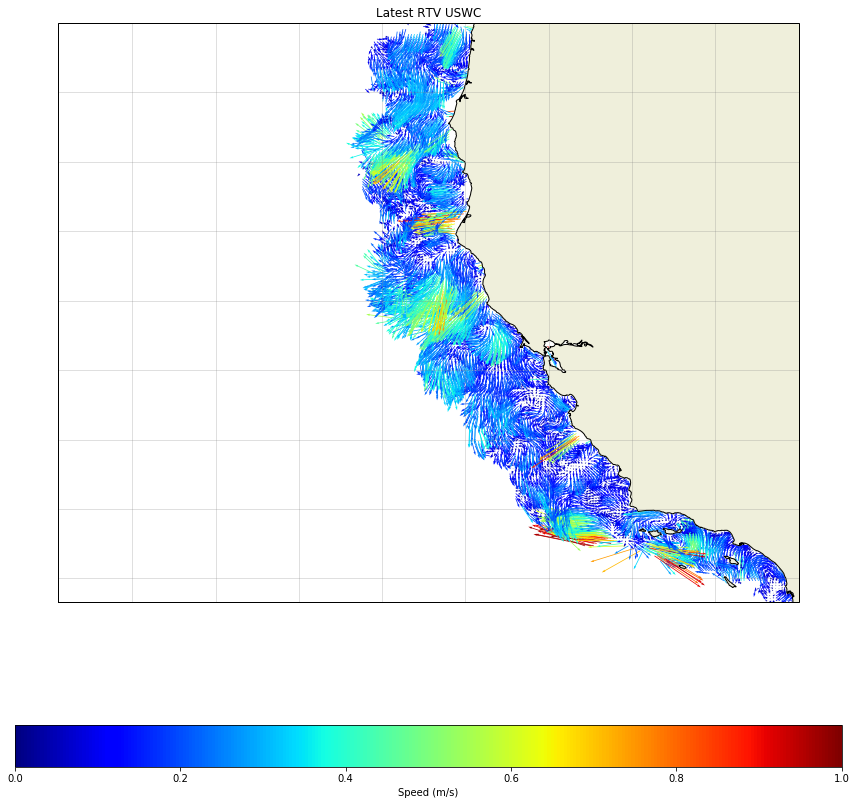

In [28]:
# Set up plot
fig=plt.figure(figsize=(12,12))
ax1=plt.axes(projection=crs.PlateCarree())
ax1.gridlines(linewidth=.5, color='gray', alpha=0.5, linestyle='-')
ax1.set_title('Latest RTV USWC')
ax1.set_extent([lonMin, lonMax, latMin, latMax])

# convert the lat/lon values to x/y projections.
x, y = np.meshgrid(lon,lat)

# mask data
data_m = np.ma.masked_invalid(CurrMag)
u_m = np.ma.masked_invalid(u)
v_m = np.ma.masked_invalid(v)

#  plot current vectors
CF=ax1.quiver(x,y,u,v,data_m,cmap=plt.cm.jet,scale=12,width=.001)
plt.colorbar(CF,label="Speed (m/s)",orientation='horizontal')

# plot landmass
ax1.add_feature(feature.NaturalEarthFeature('physical', 'land', '10m', edgecolor='face',facecolor=feature.COLORS['land']))
ax1.coastlines(resolution='10m',color='k')
plt.tight_layout()